# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

api_key = "9d731f557a30414ae6fb09ba3eb0de77" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [106]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [110]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,heihe,50.2441,127.4902,18.32,85,98,4.16,CN,1723161351
1,punta arenas,-53.1500,-70.9167,6.06,87,75,2.06,CL,1723161353
2,abrud,46.2667,23.0667,16.22,73,22,1.69,RO,1723161354
3,adamstown,-25.0660,-130.1015,22.01,80,49,11.16,PN,1723161355
4,ushuaia,-54.8000,-68.3000,5.81,75,75,6.69,AR,1723161356


In [120]:
# Export the City_Data into a csv
csv_file_path = "/Users/edward/Desktop/python-api-challenge/WeatherPy/city_data.csv"

city_data_df.to_csv("csv_file_path", index_label="City_ID")

In [124]:
# Read saved data
city_data_df = pd.read_csv("csv_file_path", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,heihe,50.2441,127.4902,18.32,85,98,4.16,CN,1723161351
1,punta arenas,-53.1500,-70.9167,6.06,87,75,2.06,CL,1723161353
2,abrud,46.2667,23.0667,16.22,73,22,1.69,RO,1723161354
3,adamstown,-25.0660,-130.1015,22.01,80,49,11.16,PN,1723161355
4,ushuaia,-54.8000,-68.3000,5.81,75,75,6.69,AR,1723161356


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

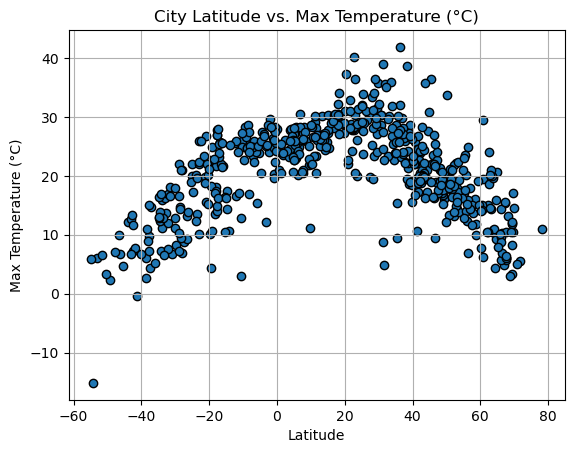

In [128]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o")

plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

save_path = "/Users/edward/Desktop/python-api-challenge/WeatherPy/City Latitude vs Max Temperature.png"

plt.savefig(save_path)
plt.show()

#### Latitude Vs. Humidity

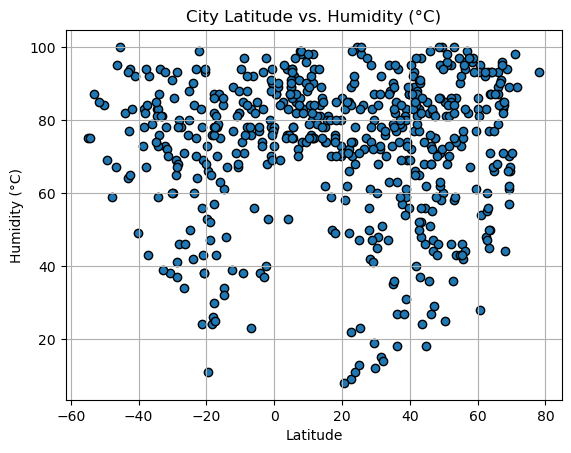

In [136]:
# Build scatter plot for latitude vs. humidity
 
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o")

plt.title("City Latitude vs. Humidity (°C)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (°C)")
plt.grid(True)

save_path = "/Users/edward/Desktop/python-api-challenge/WeatherPy/City Latitude vs Humidity.png"

plt.savefig(save_path)
plt.show()


#### Latitude Vs. Cloudiness

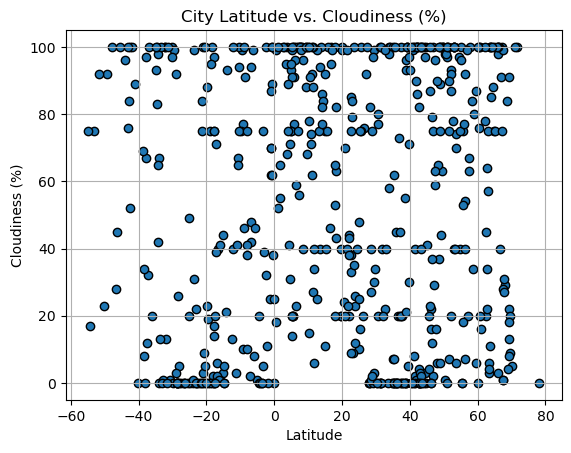

In [138]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o")

plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

save_path = "/Users/edward/Desktop/python-api-challenge/WeatherPy/City Latitude vs Cloudiness.png"

plt.savefig(save_path)
plt.show()



#### Latitude vs. Wind Speed Plot

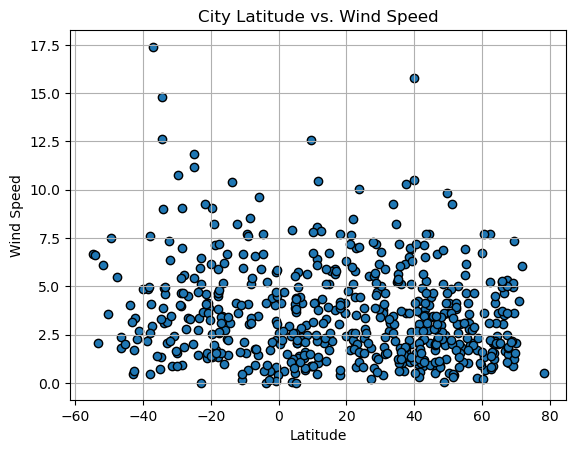

In [140]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

save_path = "/Users/edward/Desktop/python-api-challenge/WeatherPy/City Latitude vs Wind Speed.png"

plt.savefig(save_path)
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [154]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, xlabel, ylabel, title, save_path):
    """
    Create a scatter plot with a linear regression line using scipy.stats.linregress.

    Parameters:
    - x: Array-like, independent variable data
    - y: Array-like, dependent variable data
    - xlabel: String, label for the x-axis
    - ylabel: String, label for the y-axis
    - title: String, title of the plot
    - save_path: String, path to save the plot
    """
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(x, y)
    
    # Generate x values for the regression line
    x_reg = np.linspace(min(x), max(x), 100)
    y_reg = slope * x_reg + intercept
    
    # Create scatter plot
    plt.scatter(x, y, edgecolors="black", marker="o", label="Data")
    
    # Plot the linear regression line
    plt.plot(x_reg, y_reg, color="red", linewidth=2, label="Linear Regression")
    
    # Add graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    
    # Save and show the plot
    plt.savefig("/Users/edward/Desktop/python-api-challenge/WeatherPy/")
    plt.show()


In [156]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,heihe,50.2441,127.4902,18.32,85,98,4.16,CN,1723161351
2,abrud,46.2667,23.0667,16.22,73,22,1.69,RO,1723161354
5,boone,39.0334,-92.3335,26.40,74,100,2.62,US,1723161358
6,marsa alam,25.0757,34.8918,32.06,47,10,2.31,EG,1723161359
8,lompoc,34.6391,-120.4579,22.69,73,0,8.23,US,1723161363


In [158]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,6.06,87,75,2.06,CL,1723161353
3,adamstown,-25.0660,-130.1015,22.01,80,49,11.16,PN,1723161355
4,ushuaia,-54.8000,-68.3000,5.81,75,75,6.69,AR,1723161356
7,waitangi,-43.9535,-176.5597,12.12,82,96,4.02,NZ,1723161361
12,manismata,-2.4667,111.0333,24.07,97,100,1.71,ID,1723161370


###  Temperature vs. Latitude Linear Regression Plot

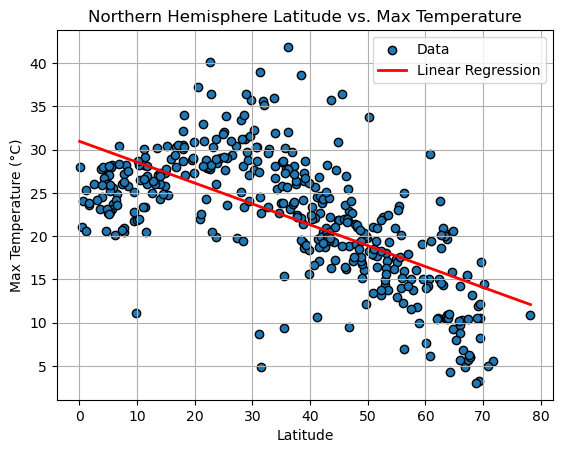

In [174]:
#Linear regression on Northern Hemisphere temperature vs. latitude
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    xlabel="Latitude", 
    ylabel="Max Temperature (°C)", 
    title="Northern Hemisphere Latitude vs. Max Temperature", 
    save_path="/Users/edward/Desktop/python-api-challenge/WeatherPy/Northern_Hemisphere_Lat_vs_MaxTemp_Regression.png"
)


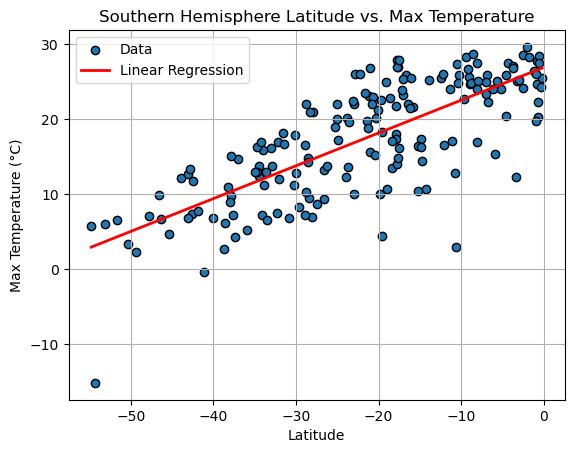

In [196]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    xlabel="Latitude", 
    ylabel="Max Temperature (°C)", 
    title="Southern Hemisphere Latitude vs. Max Temperature", 
    save_path = "/Users/edward/Desktop/python-api-challenge/WeatherPy/Southern_Hemisphere_Lat_vs_MaxTemp_Regression.png"
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

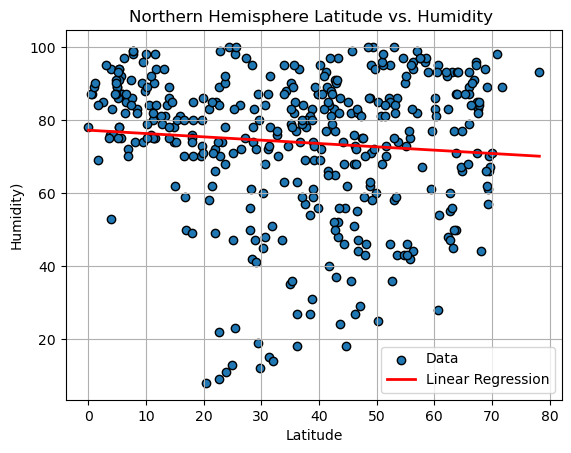

In [198]:
# Perform linear regression on Northern Hemisphere humidity vs. latitude
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    xlabel="Latitude", 
    ylabel="Humidity)", 
    title="Northern Hemisphere Latitude vs. Humidity ", 
    save_path="/Users/edward/Desktop/python-api-challenge/WeatherPy/Northern_Hemisphere_Lat_vs_MaxTemp_Regression.png"
)




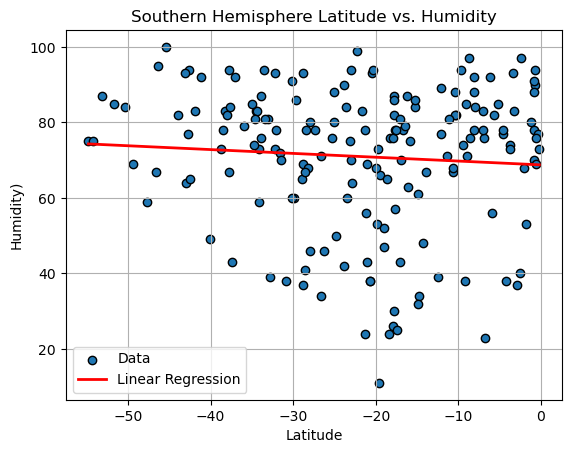

In [200]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    xlabel="Latitude", 
    ylabel="Humidity)", 
    title="Southern Hemisphere Latitude vs. Humidity", 
    save_path="/Users/edward/Desktop/python-api-challenge/WeatherPy/Southern_Hemisphere_Lat_vs_MaxTemp_Regression.png"
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

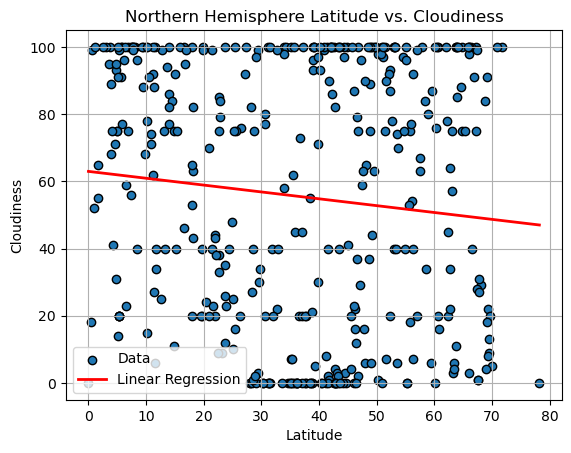

In [204]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    xlabel="Latitude", 
    ylabel="Cloudiness", 
    title="Northern Hemisphere Latitude vs. Cloudiness", 
    save_path="/Users/edward/Desktop/python-api-challenge/WeatherPy/Northern_Hemisphere_Lat_vs_Cloudiness.png"
)


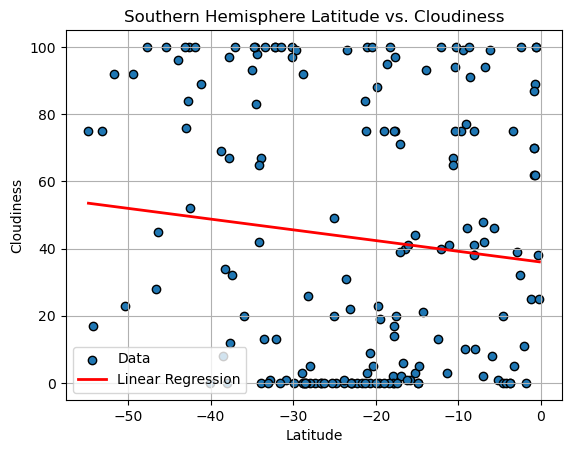

In [206]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    xlabel="Latitude", 
    ylabel="Cloudiness", 
    title="Southern Hemisphere Latitude vs. Cloudiness", 
    save_path="/Users/edward/Desktop/python-api-challenge/WeatherPy/Southern_Hemisphere_Lat_vs_Cloudiness.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

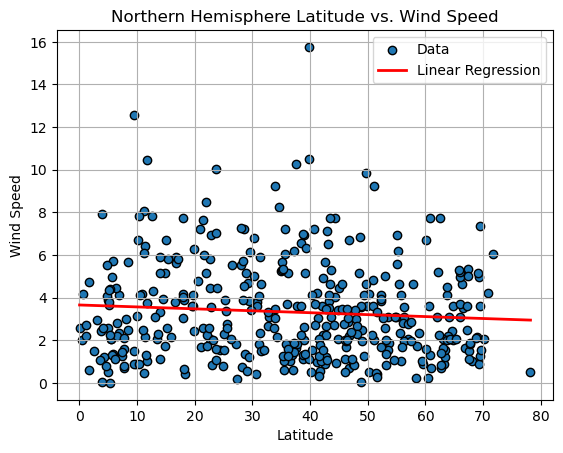

In [212]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    xlabel="Latitude", 
    ylabel="Wind Speed", 
    title="Northern Hemisphere Latitude vs. Wind Speed", 
    save_path="/Users/edward/Desktop/python-api-challenge/WeatherPy/Northern_Hemisphere_Lat_vs_Wind Speed.png"
)

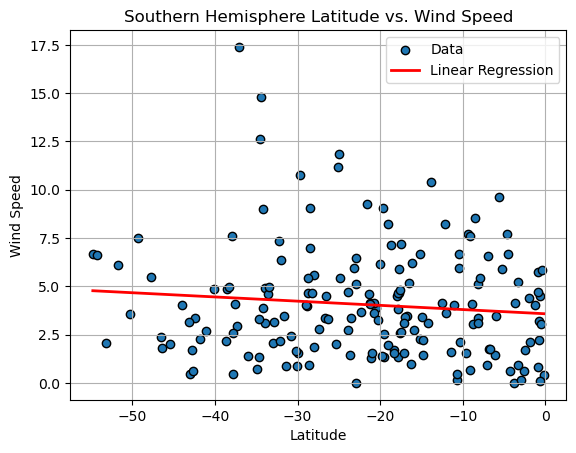

In [216]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    xlabel="Latitude", 
    ylabel="Wind Speed", 
    title="Southern Hemisphere Latitude vs. Wind Speed", 
    save_path="/Users/edward/Desktop/python-api-challenge/WeatherPy/Southern_Hemisphere_Lat_vs_Wind Speed.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE